# Интеллектуальный анализ данных – весна 2024
# Домашнее задание 6: классификация текстов

Правила:



*   Домашнее задание оценивается в 10 баллов.
*   Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.
*  Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.
*  Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.
*  Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.

В этом домашнем задании вам предстоит построить классификатор текстов.

Будем предсказывать эмоциональную окраску твиттов о коронавирусе.



In [2]:
import numpy as np
import pandas as pd
from typing import  List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation

In [3]:
!wget 'https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2024/homeworks/hw06_texts/tweets_coronavirus.csv'


--2024-05-13 19:16:16--  https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2024/homeworks/hw06_texts/tweets_coronavirus.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8829280 (8.4M) [text/plain]
Saving to: ‘tweets_coronavirus.csv’

tweets_coronavirus. 100%[===================>]   8.42M  --.-KB/s    in 0.09s   

2024-05-13 19:16:16 (94.2 MB/s) - ‘tweets_coronavirus.csv’ saved [8829280/8829280]



In [4]:
df = pd.read_csv('/content/tweets_coronavirus.csv', encoding='latin-1')
df.sample(4)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
32807,44151,89103,Rabat - SalÃÂ© - Zemmour - ZaÃÂ«r,13-04-2020,"National Markets: Normal Supply, Stable Prices...",Positive
1365,5453,50405,"Okinawa-shi, Okinawa",17-03-2020,"If this COVID-19 brings apocalypse in US, IÃÂ...",Negative
26844,36714,81666,"London, England ??",07-04-2020,ÃÂWithin countries there are going to be a l...,Positive
32200,43407,88359,"NYC, London, Tokyo, Mexico, Sydney, Johannesburg",13-04-2020,Introducing the Great Minds Masterclass Series...,Extremely Positive


Для каждого твитта указано:


*   UserName - имя пользователя, заменено на целое число для анонимности
*   ScreenName - отображающееся имя пользователя, заменено на целое число для анонимности
*   Location - местоположение
*   TweetAt - дата создания твитта
*   OriginalTweet - текст твитта
*   Sentiment - эмоциональная окраска твитта (целевая переменная)



## Задание 1 Подготовка (0.5 балла)

Целевая переменная находится в колонке `Sentiment`.  Преобразуйте ее таким образом, чтобы она стала бинарной: 1 - если у твитта положительная эмоциональная окраска и 0 - если отрицательная.

In [5]:

df['Sentiment']=np.where((df['Sentiment']=='Positive') | (df['Sentiment']=='Extremely Positive'),1,0)
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,1
1,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,1
2,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,1
3,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0
4,3804,48756,"ÃÂT: 36.319708,-82.363649",16-03-2020,As news of the regionÃÂs first confirmed COV...,1
...,...,...,...,...,...,...
33439,44949,89901,OHIO,14-04-2020,I never that weÃÂd be in a situation &amp; w...,1
33440,44950,89902,NaN,14-04-2020,@MrSilverScott you are definitely my man. I fe...,1
33441,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,0
33442,44953,89905,NaN,14-04-2020,You know itÃÂs getting tough when @KameronWi...,1


Сбалансированы ли классы?

In [6]:
df['Sentiment'].value_counts()
#сбалансированы

Sentiment
1    18046
0    15398
Name: count, dtype: int64

In [7]:
print(round(df['Sentiment'].value_counts()[1]/(df['Sentiment'].value_counts()[0]+df['Sentiment'].value_counts()[1])*100,2))

53.96


In [8]:
print(100-round(df['Sentiment'].value_counts()[1]/(df['Sentiment'].value_counts()[0]+df['Sentiment'].value_counts()[1])*100,2))

46.04


In [9]:
# Как мы видим классы сбалансированны, так как в процентном отношении они очень близки.

**Ответ:** # -- YOUR ANSWER HERE --

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их строкой 'Unknown'.

In [10]:

df.isna().sum()
#  Как видно, пропуски присутствуют только в Location

UserName            0
ScreenName          0
Location         7049
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [11]:
df['Location'] = df['Location'].fillna('Unknown')

Разделите данные на обучающие и тестовые в соотношении 7 : 3 и `random_state=0`

In [12]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df,test_size=0.3, random_state=0)


In [13]:

train_new=train.reset_index(drop=True, inplace=False)

In [14]:
train_new

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,35178,80130,Unknown,06-04-2020,Why we still want to buy so much stuff during ...,1
1,40819,85771,"Boston, MA HQ",10-04-2020,With driving even more usage a strong strategy...,1
2,39249,84201,India,09-04-2020,@Canon_India I am very happy.. Great job by @C...,1
3,11068,56020,"Mayfair, London, UK",19-03-2020,The U.S national debt will likely exceed $30 T...,0
4,9109,54061,WNC,18-03-2020,"Finally got to the grocery store. Honestly, wh...",1
...,...,...,...,...,...,...
23405,29120,74072,Unknown,31-03-2020,Football is in ruins right now.When it will re...,0
23406,43291,88243,"Waterville, Ireland Austin, TX",13-04-2020,Hand sanitizer made here on the Skellig Coast!...,1
23407,41159,86111,"Mumbai , Delhi India",10-04-2020,An initiative taken by our @GOLDENINITIATI1 ...,1
23408,29702,74654,Unknown,01-04-2020,Vile premiership players demanding full wages ...,0


## Задание 2 Токенизация (3 балла)

Постройте словарь на основе обучающей выборки и посчитайте количество встреч каждого токена с использованием самой простой токенизации - деления текстов по пробельным символам и приведение токенов в нижний регистр

In [15]:
# # -- YOUR CODE HERE --
a=''
for i in range (train_new.shape[0]):
  a+=train_new['OriginalTweet'][i]

a = a.lower().split()



In [16]:
dictionary={}
for word in a:
  if word in dictionary:
    dictionary[word] += 1
  else:
    dictionary[word] = 1
dictionary


{'why': 543,
 'we': 3441,
 'still': 747,
 'want': 463,
 'to': 23217,
 'buy': 741,
 'so': 1660,
 'much': 478,
 'stuff': 105,
 'during': 1831,
 'quarantine': 141,
 'https://t.co/1m881cwfuv': 1,
 '#shopping': 115,
 '#covid_19': 1313,
 '#onlinewith': 1,
 'driving': 74,
 'even': 650,
 'more': 1905,
 'usage': 22,
 'a': 11406,
 'strong': 90,
 'strategy': 31,
 'is': 7280,
 'critical': 154,
 'now': 1260,
 'then': 434,
 'ever': 172,
 'luckily': 8,
 'and': 14626,
 'april': 158,
 '16': 34,
 'webinar': 63,
 'will': 2691,
 'dive': 10,
 'into': 666,
 'growing': 81,
 'app': 50,
 'awareness': 30,
 'targeting': 9,
 'high': 402,
 'lifetime': 4,
 'value': 78,
 'users@canon_india': 1,
 'i': 4580,
 'am': 412,
 'very': 398,
 'happy..': 1,
 'great': 361,
 'job': 240,
 'by': 2207,
 '@canon_india': 8,
 '#canonforcommunity': 5,
 'https://t.co/z0intks34xthe': 1,
 'u.s': 7,
 'national': 116,
 'debt': 67,
 'likely': 170,
 'exceed': 14,
 '$30': 7,
 'trillion': 21,
 'after': 826,
 'the': 25775,
 'unprecedented': 89,


Какой размер словаря получился?

In [17]:
# -- YOUR CODE HERE --
len(dictionary)

86999

Выведите 10 самых популярных токенов с количеством встреч каждого из них. Объясните, почему именно эти токены в топе

In [18]:
# -- YOUR CODE HERE --
a=0
for i in sorted(dictionary, key=dictionary.get, reverse=True):
  a+=1
  if a>10:
    break
  else:
    print(i, dictionary[i])

#  Токены являются стоп словами, которые встречаются практически всегда в английском языке, также #coronavirus, что было актуально в то время из-за пандемии.

the 25775
to 23217
and 14626
of 12973
a 11406
in 10898
for 8436
is 7280
are 6980
#coronavirus 6761


**Ответ:** # -- YOUR ANSWER HERE --

Удалите стоп-слова из словаря и выведите новый топ-10 токенов (и количество встреч) по популярности.  Что можно сказать  о нем?

In [19]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords", quiet=True)
stopwords=(stopwords.words("english"))

a=0
for i in sorted(dictionary, key=dictionary.get, reverse=True):
  if i in set(stopwords):
    continue
  if a>9:
    break
  else:
    a+=1
    print(i, dictionary[i])

# как мы видим, слова макисмально актуальны для пандемии: #coronavirus, цены, еда , магазины.

#coronavirus 6761
prices 3767
food 3677
grocery 3350
supermarket 3181
store 3123
people 3033
covid-19 2984
&amp; 2313
#covid19 2214


**Ответ:**  # -- YOUR ANSWER HERE --

Также выведите 20 самых непопулярных слов (если самых непопулярных слов больше выведите любые 20 из них) Почему эти токены непопулярны, требуется ли как-то дополнительно работать с ними?

In [20]:
# -- YOUR CODE HERE --
a=0
for i in sorted(dictionary, key=dictionary.get, reverse=False):
  a+=1
  if a>20:
    break
  else:
    print(i, dictionary[i])

# как мы видим непопулярны токены-хэштеги(рандомные), странные написания слов и ссылки на аккаунты (очевидно, что по этой причине они непопулярны).
# Их можно удалить из словаря и не использовать в анализе.

https://t.co/1m881cwfuv 1
#onlinewith 1
users@canon_india 1
happy.. 1
https://t.co/z0intks34xthe 1
mnuchinãâs 1
brink.finally 1
https://t.co/jmobv8z0u0friends: 1
university's 1
teaching.) 1
@catholicpres 1
@catholicuniv 1
https://t.co/evqby035wfit's 1
#toiletpaperregulatory 1
https://t.co/riqrhxxeim 1
@@ballardspahrll 1
#acaplease 1
easier...take 1
ãânecessaryãâ 1
#quarantinelifequeues 1


**Ответ:** # -- YOUR ANSWER HERE --



Теперь воспользуемся токенайзером получше - TweetTokenizer из библиотеки nltk. Примените его и посмотрите на топ-10 популярных слов. Чем он отличается от топа, который получался раньше? Почему?

In [21]:
from nltk.tokenize import TweetTokenizer

tw = TweetTokenizer()

a=''
for i in range (train.shape[0]+1):
  a+=df['OriginalTweet'][i]
tokens=tw.tokenize(a)

In [22]:

dictionary1={}
for word in tokens:
  if word in dictionary1:
    dictionary1[word] += 1
  else:
    dictionary1[word] = 1
dictionary1

{'advice': 140,
 'Talk': 8,
 'to': 23165,
 'your': 2661,
 'neighbours': 30,
 'family': 318,
 'exchange': 14,
 'phone': 90,
 'numbers': 63,
 'create': 72,
 'contact': 165,
 'list': 173,
 'with': 3661,
 'of': 13045,
 'schools': 60,
 'employer': 14,
 'chemist': 14,
 'GP': 6,
 'set': 155,
 'up': 2230,
 'online': 1615,
 'shopping': 1757,
 'accounts': 28,
 'if': 1267,
 'poss': 1,
 'adequate': 20,
 'supplies': 543,
 'regular': 69,
 'meds': 23,
 'but': 1902,
 'not': 2496,
 'over': 819,
 'orderCoronavirus': 1,
 'Australia': 71,
 ':': 3423,
 'Woolworths': 13,
 'give': 250,
 'elderly': 343,
 ',': 18018,
 'disabled': 57,
 'dedicated': 44,
 'hours': 364,
 'amid': 488,
 'COVID': 3439,
 '-': 6081,
 '19': 5821,
 'outbreak': 621,
 'https://t.co/bInCA9Vp8PMy': 1,
 'food': 4234,
 'stock': 1245,
 'is': 7358,
 'the': 24430,
 'only': 821,
 'one': 979,
 'which': 477,
 'empty': 532,
 '...': 1867,
 'PLEASE': 69,
 "don't": 473,
 'panic': 1871,
 'THERE': 15,
 'WILL': 40,
 'BE': 32,
 'ENOUGH': 3,
 'FOOD': 57,
 'F

In [23]:
a=0
for i in sorted(dictionary1, key=dictionary1.get, reverse=True):
  a+=1
  if a>10:
    break
  else:
    print(i, dictionary1[i])

# как мы видим появились знаки препинания, а также стоп слова

the 24430
. 23918
to 23165
, 18018
and 14597
of 13045
a 10894
in 10451
? 9862
for 8330


**Ответ:** # -- YOUR ANSWER HERE --

Удалите из словаря стоп-слова и пунктуацию, посмотрите на новый топ-10 слов с количеством встреч, есть ли теперь в нем что-то не похожее на слова?

In [24]:
from string import punctuation

import nltk
from nltk.corpus import stopwords
nltk.download("stopwords", quiet=True)
stopwords=(stopwords.words("english"))

a=0
for i in sorted(dictionary1, key=dictionary1.get, reverse=True):
  if i in set(stopwords) or i in punctuation :
    continue
  if a>9:
    break
  else:
    a+=1
    print(i, dictionary1[i])

# Да, появились числа, знак(минус), а также буквы в кодеровке и хэштеги

Â 7454
 7359
#coronavirus 6816
19 5821
I 4890
 4522
food 4234
prices 4015
store 3808
supermarket 3641


**Ответ:** # -- YOUR ANSWER HERE --

Удалите из словаря токены из одного символа, с позицией в таблице Unicode 128 и более (`ord(x) >= 128`)

Выведите топ-10 самых популярных и топ-20 непопулярных слов. Чем полученные топы отличаются от итоговых топов, полученных при использовании токенизации по пробелам? Что теперь лучше, а что хуже?

In [25]:
# -- YOUR CODE HERE --
from string import punctuation

import nltk
from nltk.corpus import stopwords
nltk.download("stopwords", quiet=True)
stopwords=(stopwords.words("english"))

a=0
for i in sorted(dictionary1, key=dictionary1.get, reverse=True):
  if i in set(stopwords) or i in set(punctuation) :
    continue
  if len(i)==1 and ord(i)>=128:
    continue
  if a>9:
    break
  else:
    a+=1
    print(i, dictionary1[i])

# отличаются тем, что появились цифры, а также слова с большой буквы, в целом сходство большее

#coronavirus 6816
19 5821
I 4890
food 4234
prices 4015
store 3808
supermarket 3641
COVID 3439
people 3285
grocery 3120


In [26]:
from string import punctuation

import nltk
from nltk.corpus import stopwords
nltk.download("stopwords", quiet=True)
stopwords=(stopwords.words("english"))

a=0
for i in sorted(dictionary1, key=dictionary1.get, reverse=False):
  if i in set(stopwords) or i in set(punctuation) :
    continue
  if len(i)==1 and ord(i)>=128:
    continue
  if a>19:
    break
  else:
    a+=1
    print(i, dictionary1[i])

# тут также много ссылок на страницы людей, столько же хэштегов(с большой буквы), а также странно написанных слов
# по токенам сложно судить, но так как TweetTokenizer выделяет смайлики, а в социальных сетях это важно.

poss 1
orderCoronavirus 1
https://t.co/bInCA9Vp8PMy 1
#ConfinementGeneral 1
https://t.co/zrlG0Z520jMe 1
litteraly 1
#CoronavirusFrance 1
https://t.co/usmuaLq72nAs 1
@Tim_Dodson 1
https://t.co/cfXch7a2lUCashier 1
Civics 1
https://t.co/ieFDNeHgDODue 1
https://t.co/kw91zJ5O5iFor 1
#govindia 1
#IndiaFightsCoronaDue 1
#horningsea 1
https://t.co/lsGrXXhjhhMe 1
https://t.co/8YWaKFjExCADARA 1
Up-To-Date 1
https://t.co/PnA797jDKV 1


**Ответ:** # -- YOUR ANSWER HERE --

Выведите топ-10 популярных хештегов с количеством встреч. Что можно сказать о них?

In [27]:
# -- YOUR CODE HERE --
a=0
for i in sorted(dictionary1, key=dictionary1.get, reverse=True):
  if i[0]=='#' :
    print(i, dictionary1[i])
    a+=1
  if a>9:
    break

# все они связаны с короновирусом, что неудивительно

#coronavirus 6816
#COVID19 1689
#Covid_19 1308
#Coronavirus 1206
#COVID2019 831
#toiletpaper 662
#COVID 549
#covid19 459
#CoronaCrisis 448
#CoronaVirus 359


**Ответ:** # -- YOUR ANSWER HERE --

То же самое проделайте для ссылок на сайт https://t.co Сравнима ли популярность ссылок с популярностью хештегов? Будет ли информация о ссылке на конкретную страницу полезна?

In [28]:
# -- YOUR CODE HERE --
a=0
for i in sorted(dictionary1, key=dictionary1.get, reverse=True):
  if i.startswith('https://t.co'):
    print(i, dictionary1[i])
    a+=1
  if a>9:
    break

# популярность несравнима, так как она в сотни раз меньше, информация о ссылке не будет полезной, так как их мало и она не несет информацию(только при переходе по ней)

https://t.co/WrLHYzIzAA 4
https://t.co/ymsEmlVTTd 4
https://t.co/3kFUIOJXEp 4
https://t.co/JpGMR5HcSc 3
https://t.co/kuwIpF1KQW 3
https://t.co/WuiEEfSNOj 3
https://t.co/bTXzPMqLPb 3
https://t.co/Hpo7UWkakl 3
https://t.co/CATKegAyOY 3
https://t.co/zjNRx6dKKN 3


**Ответ:** # -- YOUR ANSWER HERE --

Используем опыт предыдущих экспериментов и напишем собственный токенайзер, улучшив TweetTokenizer. Функция tokenize должна:



*   Привести текст в нижний регистр
*   Применить TweetTokenizer для изначального выделения токенов
*   Удалить стоп-слова, пунктуацию, токены из одного символа, с позицией в таблице Unicode 128 и более и ссылки на t.co



In [1]:
def custom_tokenizer(text):
  import nltk
  from nltk.tokenize import TweetTokenizer
  tw = TweetTokenizer()
  from string import punctuation


  from nltk.corpus import stopwords
  nltk.download("stopwords", quiet=True)
  stopwords=(stopwords.words("english"))
  text=text.lower()
  tokens=tw.tokenize(text)
  new_tokens = []
  for i in tokens:
      if i not in punctuation and i not in stopwords and (len(i) != 1 or ord(i) < 128) and not i.startswith('https://t.co') :
          new_tokens.append(i)

  return new_tokens


In [29]:
custom_tokenizer('This is sample text!!!! @Sample_text I, \x92\x92 https://t.co/sample  #sampletext')

['sample', 'text', '@sample_text', '#sampletext']

## Задание 3 Векторизация текстов (2 балла)

Обучите CountVectorizer с использованием custom_tokenizer в качестве токенайзера. Как размер полученного словаря соотносится с размером изначального словаря из начала задания 2?

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(tokenizer=custom_tokenizer)
cv.fit(train['OriginalTweet'])
print(len(cv.vocabulary_))

# размер уменьшился практически в 2 раза(было 86999)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


45308


**Ответ:** # -- YOUR ANSWER HERE --

Посмотрим на какой-нибудь конкретный твитт:

In [31]:
ind = 9023
train.iloc[ind]['OriginalTweet'], train.iloc[ind]['Sentiment']

('Nice one @SkyNews lets not panic but show ppl in france queueing for food!!! #CoronavirusOutbreak #COVID2019 brainless!! Ffs',
 0)

Автор твитта не доволен ситуацией с едой во Франции и текст имеет резко негативную окраску.

Примените обученный CountVectorizer для векторизации данного текста, и попытайтесь определить самый важный токен и самый неважный токен (токен, компонента которого в векторе максимальна/минимальна, без учета 0). Хорошо ли они определились, почему?

In [32]:
# -- YOUR CODE HERE --
vectorized_text = cv.transform([train.iloc[9023]['OriginalTweet']])


print(vectorized_text)

# так как каждое слово встречается ровно 1 раз, то определить самый важный и неважный токен нельзя.

  (0, 1833)	1
  (0, 2046)	1
  (0, 16658)	1
  (0, 20553)	1
  (0, 26665)	1
  (0, 27042)	1
  (0, 27233)	1
  (0, 31579)	1
  (0, 34079)	1
  (0, 34688)	1
  (0, 35257)	1
  (0, 36413)	1
  (0, 37229)	1
  (0, 39919)	1


**Ответ:** # -- YOUR ANSWER HERE --

Теперь примените TfidfVectorizer и  определите самый важный/неважный токены. Хорошо ли определились, почему?

In [33]:
# -- YOUR CODE HERE --
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(tokenizer=custom_tokenizer)
tfidf_vec.fit(train['OriginalTweet'])
vectorized_text_1 = tfidf_vec.transform([train.iloc[9023]['OriginalTweet']])
print(vectorized_text_1)

# тут токены определилсь намного лучше, так как в Tfidf важность(коэффицент) зависит от всех слов во всех твитах.

  (0, 39919)	0.24406492401820118
  (0, 37229)	0.35434556333216544
  (0, 36413)	0.2550064610386691
  (0, 35257)	0.14759470306326164
  (0, 34688)	0.16306722855395073
  (0, 34079)	0.2542729176022132
  (0, 31579)	0.30121070136861045
  (0, 27233)	0.32047314046539654
  (0, 27042)	0.11328893069250721
  (0, 26665)	0.3244741764513268
  (0, 20553)	0.3867641170466375
  (0, 16658)	0.31042634466284263
  (0, 2046)	0.16825192939361902
  (0, 1833)	0.22584265007428544


In [34]:
feature_names = tfidf_vec.get_feature_names_out()

In [35]:
feature_names[20553]
# самый важный токен, так как слово достаточно редкое

'brainless'

In [36]:
feature_names[27042]
#  самый неважный токен, так как слово часто встречается во всех твиттах.

'food'

**Ответ:** # -- YOUR ANSWER HERE --

Найдите какой-нибудь положительно окрашенный твитт, где TfidfVectorizer хорошо (полезно для определения окраски) выделяет важный токен, поясните пример.

*Подсказка:* явно положительные твитты можно искать при помощи положительных слов (good, great, amazing и т. д.)

In [63]:
(train[train['OriginalTweet'].apply(lambda x: 'brilliant' in x) & (train['Sentiment'] == 1)])

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
24158,33331,78283,Unknown,05-04-2020,Supermarket staff are doing brilliant. But my ...,1
14195,21040,65992,"Melbourne, Victoria, Australia",23-03-2020,At least I can praise COVID-19 for this. I had...,1
28277,38476,83428,"Manchester, England",08-04-2020,Click here https://t.co/jAeaNRDjT3 for a brill...,1
10465,16496,61448,"Kathmandu, Nepal",21-03-2020,Supermarket In Denmark Uses Price Trick To Sto...,1
28734,39063,84015,South Africa,09-04-2020,Redshift recently built an online store connec...,1
18817,26704,71656,Unknown,25-03-2020,The #coronavirus has renewed the potential for...,1
1327,5405,50357,Yorkshire and The Humber,17-03-2020,Love it when artists see the funny side. Don't...,1
2567,6906,51858,Unknown,18-03-2020,Hand sanitizer was invented by a Latina!??\r\r...,1
5956,11029,55981,DELHI-DUBAI-NEW YORK,19-03-2020,"""I don't think you need to stock your pantry b...",1
18068,25786,70738,Unknown,25-03-2020,The explained brilliantly,1


In [64]:
# -- YOUR CODE HERE --
df.iloc[24158]
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(tokenizer=custom_tokenizer)
tfidf_vec.fit(train['OriginalTweet'])
vectorized_text_1 = tfidf_vec.transform([df.iloc[24158]['OriginalTweet']])
print(vectorized_text_1)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


  (0, 42818)	0.24634420019618558
  (0, 41909)	0.208910368772752
  (0, 41557)	0.08719093524692759
  (0, 40895)	0.28634372707848316
  (0, 40445)	0.14231750278239128
  (0, 40396)	0.25283770319938204
  (0, 34688)	0.12534799620958895
  (0, 34610)	0.208910368772752
  (0, 33912)	0.1139033392713554
  (0, 31687)	0.11453901555570956
  (0, 26321)	0.31157004807316585
  (0, 26169)	0.2002871065258658
  (0, 24610)	0.1555554099203469
  (0, 22088)	0.16820652962212654
  (0, 21122)	0.19900650958357538
  (0, 20687)	0.23538362211865776
  (0, 17469)	0.2178954156823077
  (0, 16972)	0.19490310596766702
  (0, 16378)	0.20128383864400318
  (0, 15246)	0.2178954156823077
  (0, 14753)	0.24634420019618558
  (0, 11956)	0.2121000317436954
  (0, 11770)	0.23642541271932996
  (0, 2046)	0.12933341907451226


In [60]:
df.iloc[24158]['OriginalTweet']

'How beautiful the way to the supermarket can be... the only thing I still get to go out for. Makes you look at things differently. #CoronavirusPandemic #coronavirus #wirbleibenzuhause https://t.co/GmVfiyO1EV'

In [61]:
feature_names = tfidf_vec.get_feature_names_out()

In [65]:
feature_names[26321]
# самый важный токен, из-за его редкости, сложно понять, почему, но это так

'face'

In [67]:
feature_names[41557]
# самый неважный токен, из-за его популяпности, выше он был среди 10 самых популярных токенов

'supermarket'

**Ответ:** # -- YOUR ANSWER HERE --

## Задание 4 Обучение первых моделей (1 балл)

Примените оба векторайзера для получения матриц с признаками текстов.  Выделите целевую переменную.

In [68]:
# -- YOUR CODE HERE --



from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(tokenizer=custom_tokenizer)
tfidf_vec.fit(train['OriginalTweet'])
tfidf_train=tfidf_vec.transform(train['OriginalTweet'])
tfidf_test=tfidf_vec.transform(test['OriginalTweet'])


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [74]:
print(tfidf_train.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [75]:
print(tfidf_test.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [71]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(tokenizer=custom_tokenizer)
cv.fit(train['OriginalTweet'])
cv_train=cv.transform(train['OriginalTweet'])
cv_test=cv.transform(test['OriginalTweet'])


In [76]:
print(cv_train.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [77]:
print(cv_test.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Обучите логистическую регрессию на векторах из обоих векторайзеров. Посчитайте долю правильных ответов на обучающих и тестовых данных. Какой векторайзер показал лучший результат? Что можно сказать о моделях?

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(cv_train, train['Sentiment'])
pred1 = clf.predict(cv_train)
pred2=clf.predict(cv_test)
print(accuracy_score(train['Sentiment'], pred1))
print(accuracy_score(test['Sentiment'], pred2))

# тут скорее всего возникает переобучение так как на трейн очень высокий результат, но показатели на тесте неплохие

0.9844510892780863
0.8672513454255532


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(tfidf_train, train['Sentiment'])
pred1 = clf.predict(tfidf_train)
pred2=clf.predict(tfidf_test)
print(accuracy_score(train['Sentiment'], pred1))
print(accuracy_score(test['Sentiment'], pred2))
# тут переобучение не так явно выражено, но результат на тесте меньше
#лучше себя показал векторайзер Counter

0.9254592054677488
0.8533984452860275


**Ответ:** # -- YOUR ANSWER HERE --

## Задание 5 Стемминг (0.5 балла)

Для уменьшения словаря можно использовать стемминг.

Модифицируйте написанный токенайзер, добавив в него стемминг с использованием SnowballStemmer. Обучите Count- и Tfidf- векторайзеры. Как изменился размер словаря?

In [81]:
def custom_stem_tokenizer(text):
  from nltk.stem.snowball import SnowballStemmer

  a=custom_tokenizer(text)
  stemmer = SnowballStemmer("english")
  tokens = [stemmer.stem(w) for w in a]

  return tokens

In [82]:
custom_stem_tokenizer('This is sample text!!!! @Sample_text I, \x92\x92 https://t.co/sample  #sampletext adding more words to check stemming')

['sampl', 'text', '@sample_text', '#sampletext', 'ad', 'word', 'check', 'stem']

In [84]:
# cv = CountVectorizer(tokenizer=custom_stem_tokenizer)
# cv.fit(train['OriginalTweet'])
# print(len(cv.vocabulary_))
tfidf_vec = TfidfVectorizer(tokenizer=custom_stem_tokenizer)
tfidf_vec.fit(train['OriginalTweet'])
print(len(tfidf_vec.vocabulary_))
# было 45308, размер словаря умеьньшился


36652


**Ответ** # -- YOUR ANSWER HERE --

Обучите логистическую регрессию с использованием обоих векторайзеров. Изменилось ли качество? Есть ли смысл применять стемминг?

In [85]:
# -- YOUR CODE HERE --
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(tokenizer=custom_stem_tokenizer)
tfidf_vec.fit(train['OriginalTweet'])
tfidf_train=tfidf_vec.transform(train['OriginalTweet'])
tfidf_test=tfidf_vec.transform(test['OriginalTweet'])

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(tfidf_train, train['Sentiment'])
pred1 = clf.predict(tfidf_train)
pred2=clf.predict(tfidf_test)
print(accuracy_score(train['Sentiment'], pred1))
print(accuracy_score(test['Sentiment'], pred2))
# результат на train упал, в то время как на test незначительное улучшение(стало меьньше переобучения)

0.9158906450234943
0.8560892963922663


In [87]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(tokenizer=custom_stem_tokenizer)
cv.fit(train['OriginalTweet'])
cv_train=cv.transform(train['OriginalTweet'])
cv_test=cv.transform(test['OriginalTweet'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(max_iter=500, random_state=42)
clf.fit(cv_train, train['Sentiment'])
pred1 = clf.predict(cv_train)
pred2=clf.predict(cv_test)
print(accuracy_score(train['Sentiment'], pred1))
print(accuracy_score(test['Sentiment'], pred2))
# результат на train уменьшился, а на test не изменился

0.9416915847928236
0.8446282639027307


**Ответ:** # -- YOUR ANSWER HERE --

## Задание  6 Работа с частотами (1.5 балла)

Еще один способ уменьшить количество признаков - это использовать параметры min_df и max_df при построении векторайзера  эти параметры помогают ограничить требуемую частоту встречаемости токена в документах.

По умолчанию берутся все токены, которые встретились хотя бы один раз.



Подберите max_df такой, что размер словаря будет 36651 (на 1 меньше, чем было). Почему параметр получился такой большой/маленький?

In [135]:
cv_df = CountVectorizer(tokenizer=custom_stem_tokenizer,
                        max_df=0.35
                        ).fit(train['OriginalTweet']

                            )
print(len(cv_df.vocabulary_))
# так как нам надо удалить всего 1 слово, а max_df убирает слова которые встречются более чем в (данном случае 35 процентах), то очевидно, что таких слов немного и поэтому коэффицент большой

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


36651


**Ответ:** # -- YOUR ANSWER HERE --

Подберите min_df (используйте дефолтное значение max_df) в CountVectorizer таким образом, чтобы размер словаря был 3700 токенов (при использовании токенайзера со стеммингом), а качество осталось таким же, как и было. Что можно сказать о результатах?

In [138]:
cv_df = CountVectorizer(tokenizer=custom_stem_tokenizer,
                        min_df=0.00045
                        ).fit(train['OriginalTweet']

                            )
print(len(cv_df.vocabulary_))
# коэффицент очеьн маленький, так как мы удаляем много слов, и действительно много слов которые встречаются очень редко.

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


3700


**Ответ:** # -- YOUR ANSWER HERE --

В предыдущих заданиях признаки не скалировались. Отскалируйте данные (при словаре размера 3.7 тысяч, векторизованные CountVectorizer), обучите логистическую регрессию, посмотрите качество и выведите `berplot` содержащий по 10 токенов, с наибольшим по модулю положительными/отрицательными весами. Что можно сказать об этих токенах?

In [93]:
from sklearn.preprocessing import StandardScaler
cv_train=cv_df.transform(train['OriginalTweet'])
cv_test=cv_df.transform(test['OriginalTweet'])
scaler=StandardScaler(with_mean=False)
cv_train = scaler.fit_transform(cv_train)
cv_test = scaler.transform(cv_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(max_iter=500, random_state=42)
clf.fit(cv_train, train['Sentiment'])
pred1 = clf.predict(cv_train)
pred2=clf.predict(cv_test)
print(accuracy_score(train['Sentiment'], pred1))
print(accuracy_score(test['Sentiment'], pred2))


0.9416915847928236
0.8446282639027307


In [94]:

coef = pd.DataFrame(clf.coef_[0], index=cv_df.get_feature_names_out(),columns=['Coef'])


In [95]:
coefs1 = coef.nlargest(10, 'Coef')
coefs1

,Coef
hand,1.231684
free,1.108275
help,1.078956
thank,1.043840
like,0.932095
best,0.922213
pleas,0.839690
great,0.817234
safe,0.793578
support,0.744163


In [96]:
coefs2 = coef.nsmallest(10, 'Coef')
coefs2

,Coef
crisi,-1.752452
panic,-1.311977
scam,-1.067300
kill,-0.763708
crude,-0.615794
stop,-0.605140
fear,-0.575247
emerg,-0.563134
wtf,-0.552531
fight,-0.542240


In [97]:
coefs = pd.concat([coefs1, coefs2], axis=0)
coefs

,Coef
hand,1.231684
free,1.108275
help,1.078956
thank,1.043840
like,0.932095
best,0.922213
pleas,0.839690
great,0.817234
safe,0.793578
support,0.744163


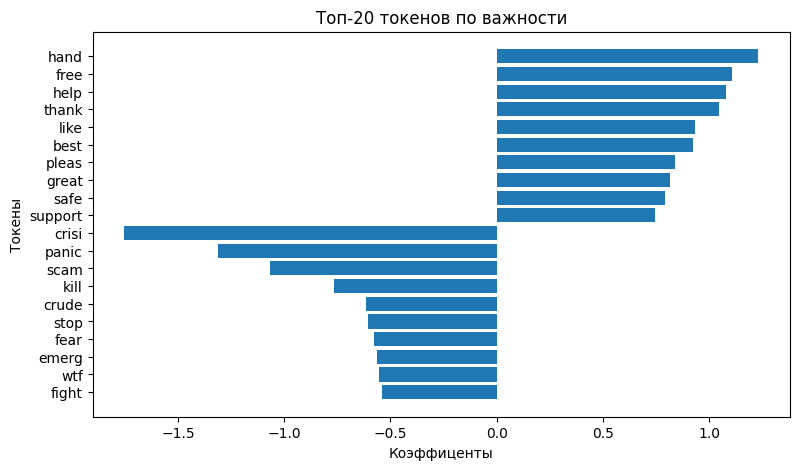

In [139]:
plt.figure(figsize=(9, 5))
plt.barh(coefs.index,coefs['Coef'])
plt.xlabel('Коэффиценты')
plt.ylabel('Токены')
plt.title('Топ-20 токенов по важности')
plt.gca().invert_yaxis()
plt.show()

# видно что токены с положиьтельными коэффицентами скорее всего относятся к sentiment 1(по ним видно, что они позитивные (help,thank,safe и тд))
# аналогично с токенами отрицательными к sentiment 0(wtf, fight и тд) Токены определились хорошо.

**Ответ:** # -- YOUR ANSWER HERE --

## Задание 7 Другие признаки (1.5 балла)

Мы были сконцентрированы на работе с текстами твиттов и не использовали другие признаки - имена пользователя, дату и местоположение

Изучите признаки UserName и ScreenName. полезны ли они? Если полезны, то закодируйте их, добавьте к матрице с отскалированными признаками, обучите логистическую регрессию, замерьте качество.

In [99]:
from sklearn.preprocessing import StandardScaler
cv_train=cv_df.transform(train['OriginalTweet'])
cv_test=cv_df.transform(test['OriginalTweet'])

user_names_array_train = train['UserName'].values.reshape(-1, 1)
screen_names_array_train = train['ScreenName'].values.reshape(-1, 1)

user_names_array_test = test['UserName'].values.reshape(-1, 1)
screen_names_array_test = test['ScreenName'].values.reshape(-1, 1)


cv_train_with_numeric_features = np.hstack([cv_train.toarray(), user_names_array_train, screen_names_array_train])
cv_test_with_numeric_features = np.hstack([cv_test.toarray(), user_names_array_test, screen_names_array_test])

scaler = StandardScaler(with_mean=False)
cv_train_scaled = scaler.fit_transform(cv_train_with_numeric_features)
cv_test_scaled = scaler.transform(cv_test_with_numeric_features)



In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(max_iter=500, random_state=42)
clf.fit(cv_train_scaled, train['Sentiment'])
pred1 = clf.predict(cv_train_scaled)
pred2=clf.predict(cv_test_scaled)
print(accuracy_score(train['Sentiment'], pred1))
print(accuracy_score(test['Sentiment'], pred2))


0.9416915847928236
0.8446282639027307


In [101]:
# как мы видим модель не улучшилась, также видно, что UserName и ScreenName уникальны в каждой записи, поэтому очевидно, что качество модели они не улучшат

**Ответ:** # -- YOUR ANSWER HERE --

Изучите признак TweetAt в обучающей выборке: преобразуйте его к типу datetime и нарисуйте его гистограмму с разделением по цвету на оспнове целевой переменной. Полезен ли он? Если полезен, то закодируйте его, добавьте к матрице с отскалированными признаками, обучите логистическую регрессию, замерьте качество.

In [102]:

train['TweetAt'] = pd.to_datetime(train['TweetAt'], format='%d-%m-%Y')


In [106]:
train['TweetAt'].value_counts()
# признак нельзя назвать полезным так как по графику видно, что по дням количества положительных и отрицатльных комментариев практически равны(+ в реальных случаях на вход будут подаваться данные в текущий момент времени, а не в прошлом)

TweetAt
2020-03-20    1996
2020-03-19    1844
2020-03-25    1742
2020-03-18    1619
2020-03-21    1531
2020-03-22    1225
2020-03-23    1174
2020-03-17    1103
2020-04-08    1044
2020-04-07    1010
2020-04-06     956
2020-04-09     847
2020-03-24     843
2020-04-13     802
2020-03-26     713
2020-04-05     614
2020-04-10     545
2020-04-02     537
2020-04-11     528
2020-04-12     446
2020-04-03     446
2020-04-04     438
2020-03-16     402
2020-04-01     347
2020-03-31     188
2020-03-27     179
2020-04-14     159
2020-03-29      69
2020-03-30      47
2020-03-28      16
Name: count, dtype: int64

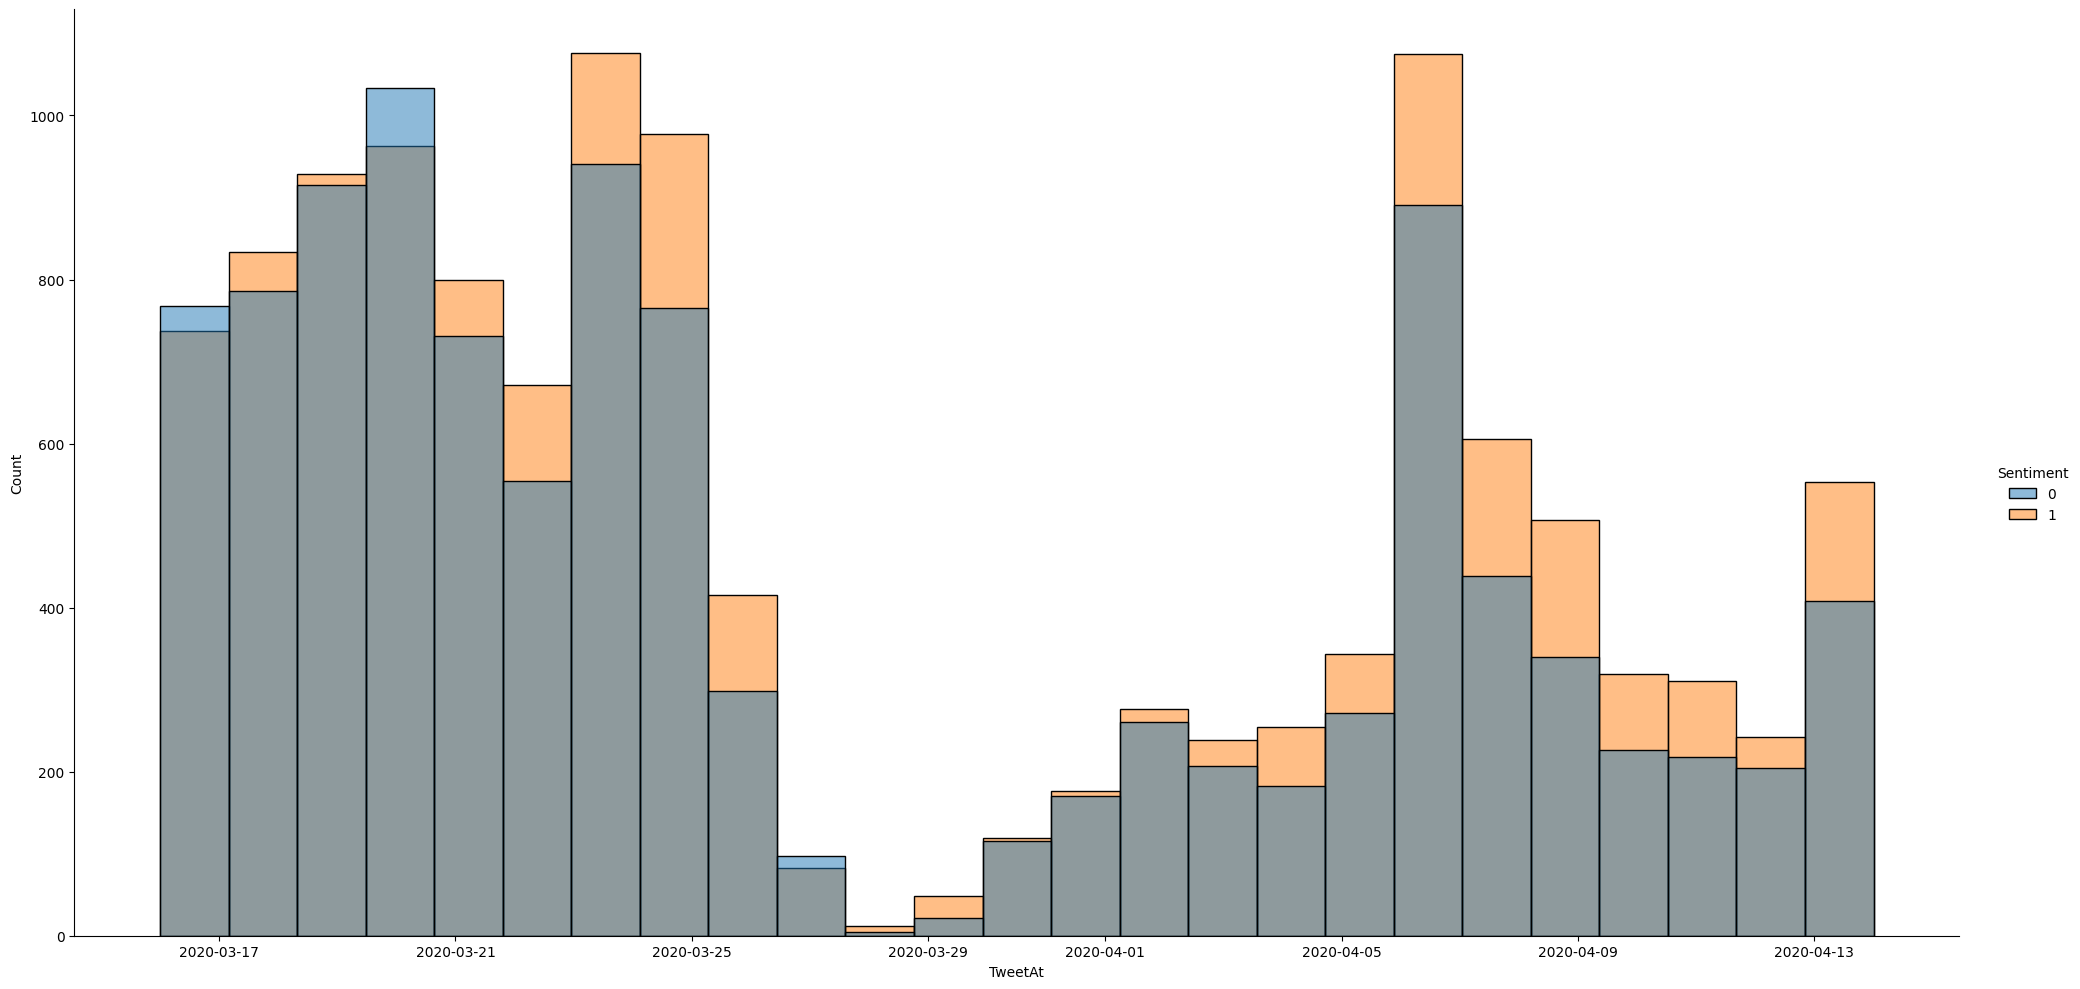

In [107]:

import seaborn as sns

sns.displot(train, x="TweetAt", hue="Sentiment",height=10, aspect=2)
plt.show()


**Ответ:** # -- YOUR ANSWER HERE --



Поработайте с признаком Location в обучающей выборке. Сколько уникальных значений?

In [108]:
# -- YOUR CODE HERE --
train['Location'].unique().size

7949

Постройте гистограмму топ-10 по популярности местоположений (исключая Unknown)

In [109]:
# -- YOUR CODE HERE --
locations = train[train['Location']!='Unknown']['Location'].value_counts().head(10)
locations

Location
London             301
United States      295
London, England    274
New York, NY       223
Washington, DC     222
United Kingdom     204
Los Angeles, CA    154
India              153
UK                 133
Australia          118
Name: count, dtype: int64

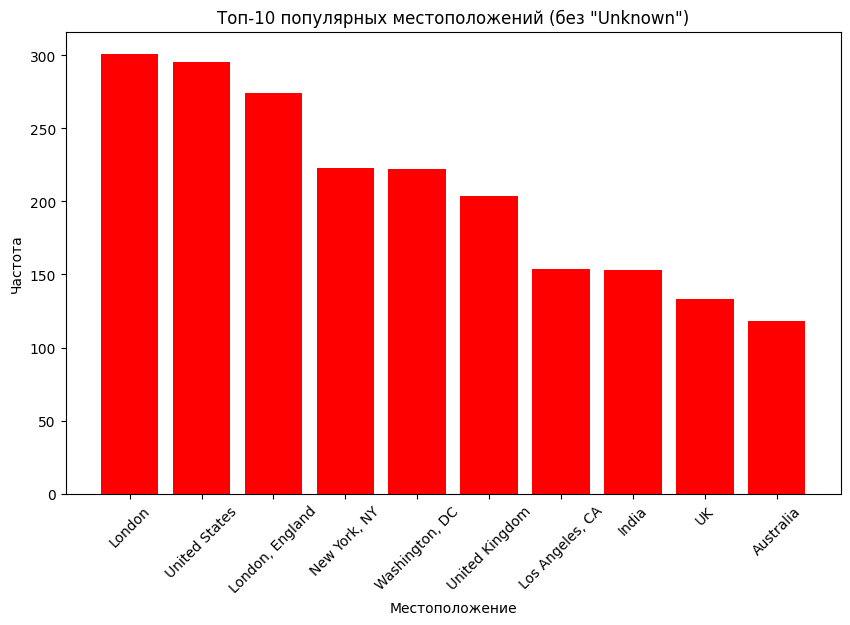

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

x = locations.index
y = locations.values

plt.bar(x, y, color='red')

plt.xlabel('Местоположение')
plt.ylabel('Частота')
plt.title('Топ-10 популярных местоположений (без "Unknown")')

plt.xticks(rotation=45)

plt.show()



Видно, что многие местоположения включают в себя более точное название места, чем другие (Например, у некоторых стоит London, UK; а у некоторых просто UK или United Kingdom).

Создайте новый признак WiderLocation, который содержит самое широкое местоположение (например, из London, UK должно получиться UK). Сколько уникальных категорий теперь? Постройте аналогичную гистограмму.

In [112]:
# -- YOUR CODE HERE --
train['Location'].value_counts()

Location
Unknown                           4944
London                             301
United States                      295
London, England                    274
New York, NY                       223
                                  ... 
Work: Kent and Live: Sussex          1
Somewhere on TradingView             1
Honolulu, Hawai?i                    1
SFO                                  1
Waterville, Ireland Austin, TX       1
Name: count, Length: 7949, dtype: int64

In [113]:
train['WiderLocation'] = np.where(train['Location'].str.contains(',') , train['Location'].str.split(',').str[-1], train['Location'])

In [114]:
test['WiderLocation'] = np.where(test['Location'].str.contains(',') , test['Location'].str.split(',').str[-1], test['Location'])

In [115]:
train['WiderLocation'].value_counts()

WiderLocation
Unknown              4944
 USA                  836
 England              833
 CA                   597
 India                383
                     ... 
DUBAI(U.A.E)            1
Self Isolation ??       1
Everywhere!!            1
On life's stage!        1
 NIGERIA                1
Name: count, Length: 5163, dtype: int64

In [117]:
train['WiderLocation'].unique().size
# количество уникальных заметон уменьшилосб

5163

Закодируйте признак WiderLocation с помощью OHE таким образом, чтобы создались только столбцы для местоположений, которые встречаются более одного раза. Сколько таких значений?


In [128]:


import pandas as pd
from sklearn.preprocessing import OneHotEncoder

WiderLocation = train['WiderLocation'].value_counts()
frequent_locations = WiderLocation[WiderLocation > 1].index


encoder = OneHotEncoder(categories=[frequent_locations], handle_unknown='ignore')


table = encoder.fit_transform(train[['WiderLocation']])

encoded_data = table.toarray()

print(encoded_data)






[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [129]:
wider_location_counts[wider_location_counts > 1].index.size
# размер 1159

1159

In [131]:

encoder1 = OneHotEncoder(categories=[frequent_locations], handle_unknown='ignore')


encoded_data_test = encoder1.fit_transform(test[['WiderLocation']])

encoded_data_test = encoded_data_test.toarray()



Добавьте этот признак к матрице отскалированных текстовых признаков, обучите логистическую регрессию, замерьте качество. Как оно изменилось? Оказался ли признак полезным?


*Подсказка:* используйте параметр `categories` в энкодере.

In [140]:
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
cv_train=cv_df.transform(train['OriginalTweet'])
cv_test=cv_df.transform(test['OriginalTweet'])

scaler=StandardScaler(with_mean=False)
cv_train = scaler.fit_transform(cv_train)
cv_test = scaler.transform(cv_test)


cv_train_with_locations = hstack([cv_train, encoded_data])
cv_test_with_locations = hstack([cv_test, encoded_data_test])


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(max_iter=500, random_state=42)
clf.fit(cv_train_with_locations, train['Sentiment'])
pred1 = clf.predict(cv_train_with_locations)
pred2=clf.predict(cv_test_with_locations)
print(accuracy_score(train['Sentiment'], pred1))
print(accuracy_score(test['Sentiment'], pred2))
# как мы видим результат на test чуть-чуть упал на test, а на train чуть чуть вырос, я считаю что признак поэтому нельзя назвать полезным(слишком несущественные изменения)



#0.9416915847928236
#0.8446282639027307


0.9460059803502776
0.8444289415985649


**Ответ:** # -- YOUR ANSWER HERE --

## Задание 8 Хорошее качество (Бонус 1 балл)

Добейтесь accuracy=0.9 на тестовой выборке (можно сменить токенайзер, векторайзер, модель и т.д.)

In [ ]:
# не смог